# Linear Regression Multiple Variables

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [148]:
df = pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


## EDA

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [150]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [151]:
df.sample()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
7,eleven,7.0,8,80000


In [152]:
# Now, Converting experience column into numerical values

exp_map = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11}
df['experience'] = df['experience'].map(exp_map)

df.experience
# df

0     NaN
1     NaN
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: experience, dtype: float64

In [156]:
miss_values = df.isnull().sum()
print(miss_values)

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64


In [154]:
mode_experience = df['experience'].mode()[0]
df['experience'].fillna(mode_experience, inplace=True)

In [155]:
imputer = SimpleImputer(strategy='mean')
df['test_score(out of 10)'] = imputer.fit_transform(df[['test_score(out of 10)']])

## Visualization

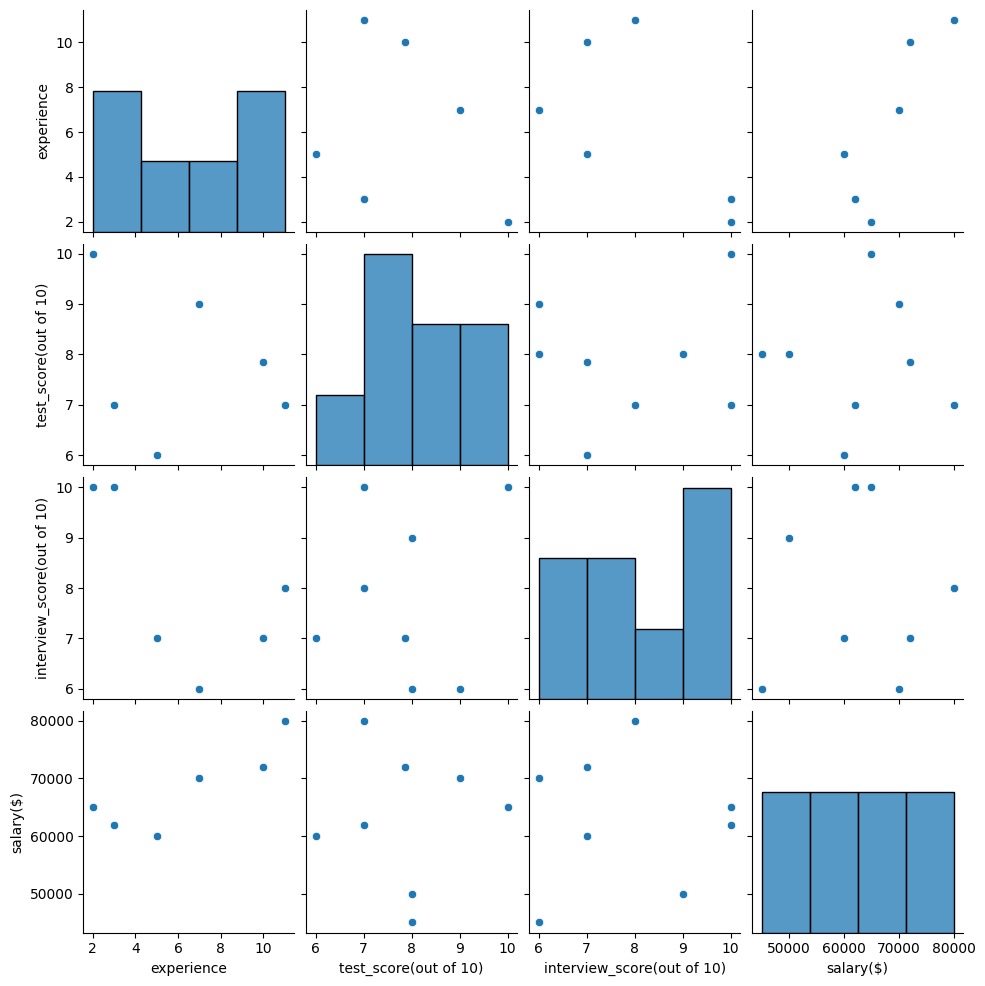

In [49]:
sns.pairplot(df)
plt.show()

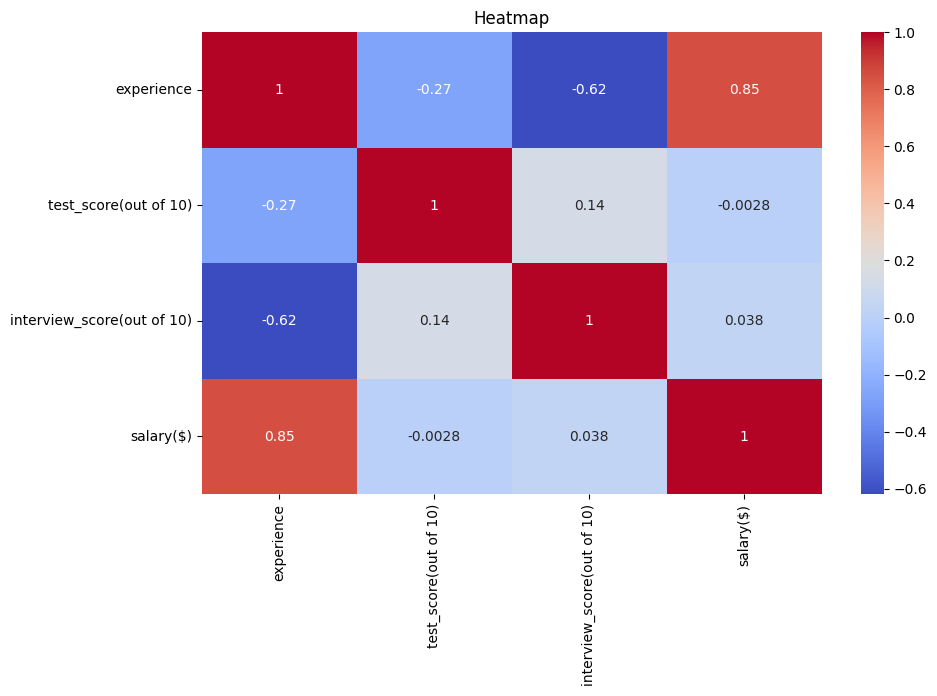

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

## Spliting data

In [157]:
x = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,2.0,8.000000,9
1,2.0,8.000000,6
2,5.0,6.000000,7
3,2.0,10.000000,10
4,7.0,9.000000,6
5,3.0,7.000000,10
6,10.0,7.857143,7
7,11.0,7.000000,8


In [160]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [161]:
x_train

,experience,test_score(out of 10),interview_score(out of 10)
0,2.0,8.000000,9
7,11.0,7.000000,8
2,5.0,6.000000,7
4,7.0,9.000000,6
3,2.0,10.000000,10
6,10.0,7.857143,7


In [162]:
y_train

0    50000
7    80000
2    60000
4    70000
3    65000
6    72000
Name: salary($), dtype: int64

In [163]:
y_test

1    45000
5    62000
Name: salary($), dtype: int64

## Model Building

In [164]:
reg = LinearRegression()

In [165]:
reg.fit(x_train, y_train)

LinearRegression()

In [167]:
y_pred = reg.predict(x_test)

In [168]:
y_pred

array([51866.18761884, 57091.3185923 ])

In [169]:
len(y_pred)

2

In [178]:
# Predict salaries 

new_candidates = pd.DataFrame({
    'experience': [8, 6, 5],
    'test_score(out of 10)': [8, 7, 6],
    'interview_score(out of 10)': [9, 8, 7]
})

pred_salaries = reg.predict(new_candidates)

In [179]:
print('Predicted Salaries for New Candidates:', pred_salaries)

Predicted Salaries for New Candidates: [72976.69520721 63444.13962962 56829.65444673]


In [195]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [198]:
print('R-squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

R-squared: 0.506991795298382
Mean Absolute Error: 5887.4345132694
Mean Squared Error: 35619842.789691895
Root Mean Squared Error: 5968.236153981501
